## section 1
Are techniques of linear regression (using SSE cost function) helpful in classification?

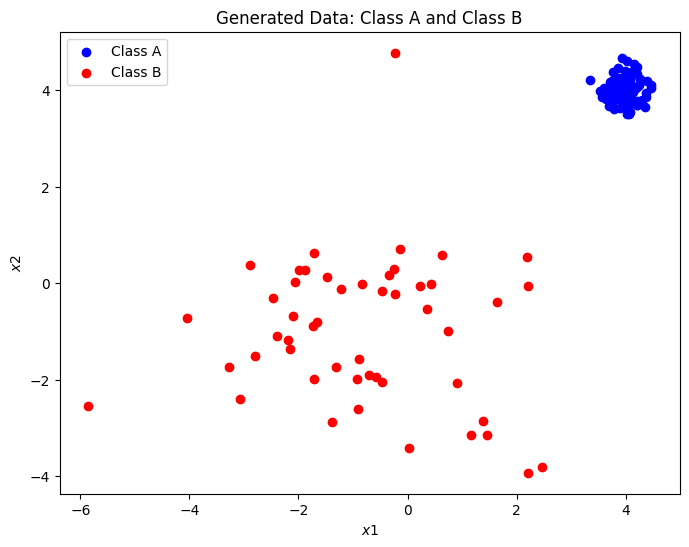

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Generating 2 data class 
np.random.seed(42)
# interms of class A
class_A = np.random.normal(loc=(4,4),scale= 0.25, size= (100,2))# class A points = 100 fetures= 2 ++ loc = means of class ++ scale = bias 
labels_A = np.ones(class_A.shape[0])# label class = 1
# interms of class B
class_B = np.random.normal(loc=(-1,-1),scale=1.5,size=(50, 2))# class B points = 50 fetures= 2 ++ loc = means of class ++ scale = bias 
labels_B = np.zeros(class_B.shape[0])# label class = 0
# make dataset
X = np.vstack((class_A,class_B)) # make X with attaching vertically classA and classB respectively
y = np.hstack((labels_A,labels_B))# make y with attaching horizantally  classA and classB respectively

plt.figure(figsize=(8,6))# the size of figure is 8 (height), 6 (width) 
plt.scatter(class_A[:, 0], class_A[:, 1], label = 'Class A', color ='b' )
plt.scatter(class_B[:, 0], class_B[:, 1], label = 'Class B', color ='r')
plt.title("Generated Data: Class A and Class B")# set the title
plt.xlabel("$x1$")# set X label
plt.ylabel("$x2$")# set y label
plt.legend()
plt.show()


As you can see, the data points are linearly separable in many ways. Now let's fit a line to them:

Model weights: w1 = 0.08,w2 = 0.11,bias = 0.22


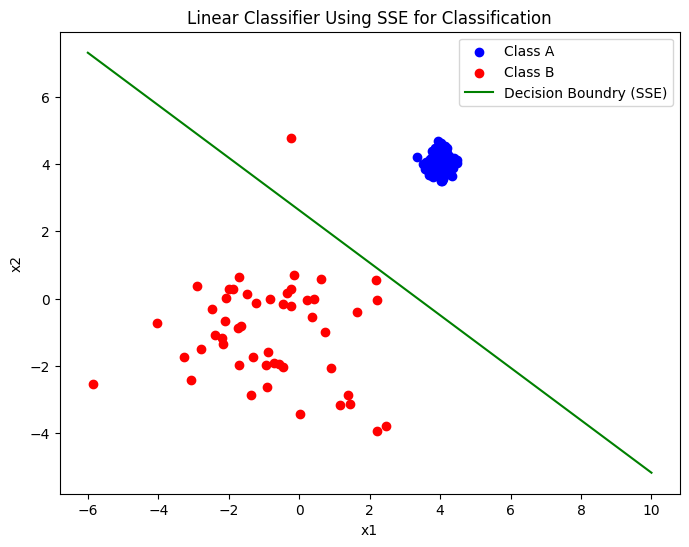

In [41]:
from sklearn.linear_model import LinearRegression
# Use the LinearRegression library from sklearn.linear_model

model = LinearRegression() #load the LinearRegression in model
model.fit(X, y) # fit the model to data 


w1, w2 = model.coef_ # weights
w0 = model.intercept_ # bias 

print(f"Model weights: w1 = {w1:.2f},w2 = {w2:.2f},bias = {w0:.2f}")

# Plot the decision boundary: w1 * x1 + w2 * x2 + b =0.5
x_vals = np.linspace(-6, 10, 100) # it is line of which seprate two class started from -6 to 10 it sperated to 100
decision_boundary = (-w1 * x_vals - w0 + 0.5)/ w2 # (-w1 * x1 - b + 0.5)/w2 = x2

plt.figure(figsize=(8, 6)) # the size of figure is 8 (height), 6 (width) 
plt.scatter(class_A[:,0], class_A[:,1], label = 'Class A', color ='b')
plt.scatter(class_B[:,0], class_B[:,1], label = 'Class B', color = 'r')
plt.plot(x_vals, decision_boundary, label = "Decision Boundry (SSE)", color = 'g')
plt.title("Linear Classifier Using SSE for Classification")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


make a function to gnerate two class which is separable from each other.

In [42]:
def generate_ab_class(n_points= 100):
    class_A = [] # make empty list for class_A
    class_B = [] # make empty list for class_B
    while len (class_A) < n_points or len(class_B) < n_points: # while two condition is true this loop continue
        x = np.random.uniform(0,10) # make random number between 0 and 10 using uniform distribution
        y = np.random.uniform(0,10) # make random number between 0 and 10 using uniform distribution 
        if y > x and len(class_A) < n_points:
            class_A.append([x,y])
        elif y < x and len(class_B) < n_points:
            class_B.append([x,y])
    return np.array(class_A), np.array(class_B)

class_A, class_B = generate_ab_class()

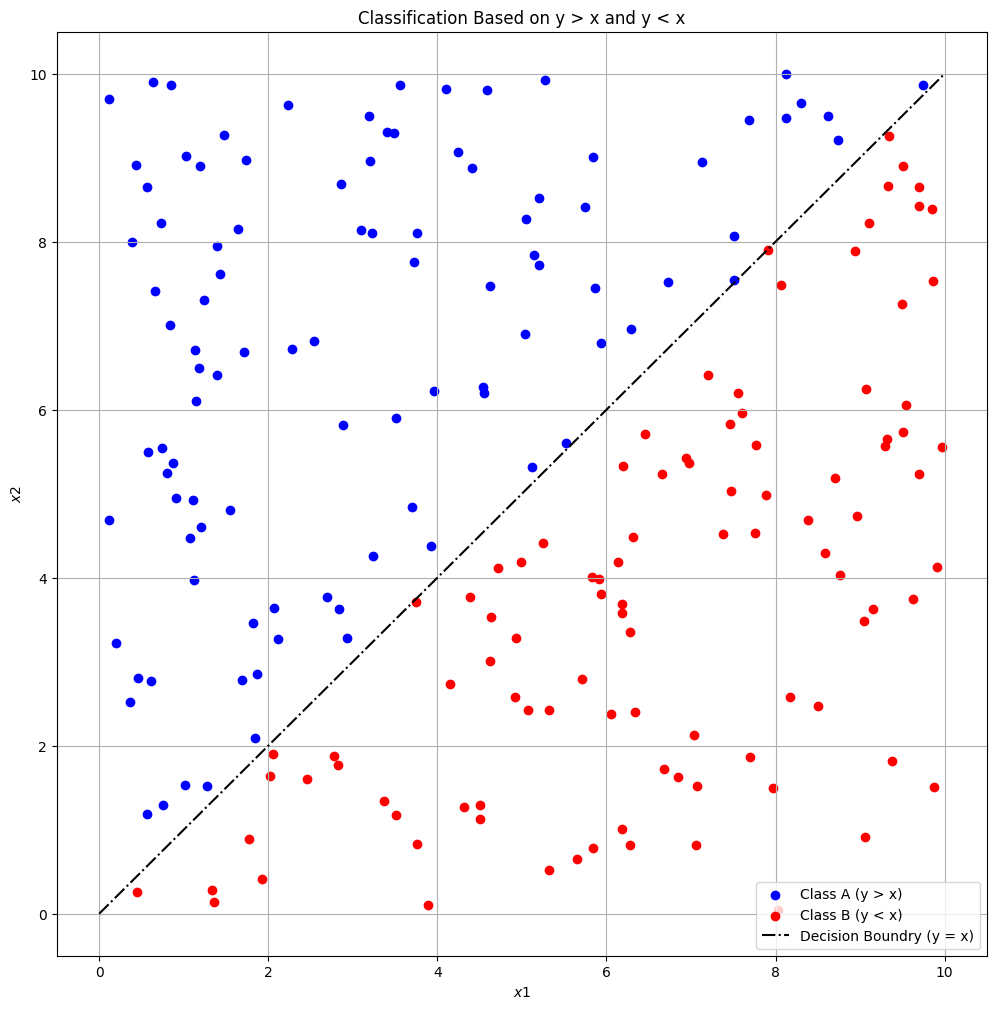

In [43]:
plt.figure(figsize=(12,12))
plt.scatter(class_A[:,0], class_A[:,1], label = 'Class A (y > x)', color = 'b')
plt.scatter(class_B[:,0],class_B[:,1], label = 'Class B (y < x)', color = 'r')
plt.plot([0,10],[0,10],color = 'black',linestyle = '-.', label='Decision Boundry (y = x)')
plt.title("Classification Based on y > x and y < x")
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
def generate_xor_data(n_points = 200, seed = 42):
    np.random.seed(seed)
    class_A = []
    class_B = []
    while len(class_A) < n_points or len(class_B) < n_points:
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)
        if (x > 0.5 and y > 0.5) or (x < 0.5 and y < 0.5):
            if len(class_A) < n_points:
                class_A.append([x,y])
        else:
            if len(class_B) < n_points:
                class_B.append([x,y])
    return np.array(class_A), np.array(class_B)

class_A_xor , class_B_xor = generate_xor_data()

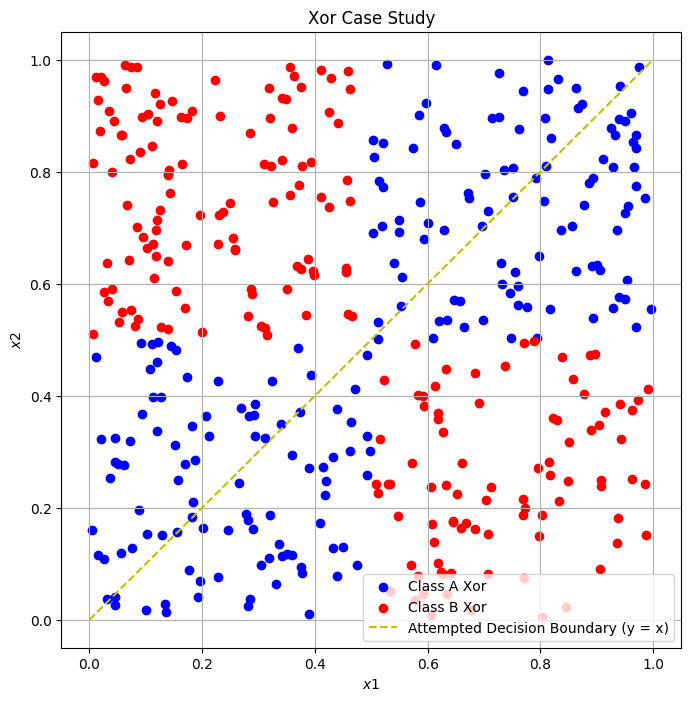

In [45]:
plt.figure(figsize=(8,8))
plt.scatter(class_A_xor[:,0],class_A_xor[:,1], label = 'Class A Xor', color = 'b')
plt.scatter(class_B_xor[:,0],class_B_xor[:,1], label = 'Class B Xor', color = 'r')
plt.plot([0,1],[0,1],color = 'y' ,linestyle='--' ,label='Attempted Decision Boundary (y = x)')
plt.title('Xor Case Study')
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.legend()
plt.grid(True)

In [46]:
def generate_data(n_points = 200, seed = 42):
    np.random.seed(seed)
    # class 0: points inside a circle with radius 5 
    radius_0 = 5
    theta_0 = np.random.uniform(0, 2 * np.pi,n_points)
    r_0 = radius_0 * np.sqrt(np.random.uniform(0,1,n_points))
    x0 = r_0*np.cos(theta_0)
    y0 = r_0*np.sin(theta_0)
    class_0 = np.vstack((x0,y0)).T

    # class 1:point in an annulus between radius 8 and 10
    inner_radius_1 = 8
    outer_radius_1 = 10
    theta_1 =np.random.uniform(0,2*np.pi,n_points)
    r_1 = np.sqrt(np.random.uniform(inner_radius_1**2,outer_radius_1**2,n_points))
    x1 = r_1*np.cos(theta_1)
    y1 = r_1*np.sin(theta_1)
    class_1 = np.vstack((x1,y1)).T

    return class_0, class_1

class_0 , class_1 = generate_data()


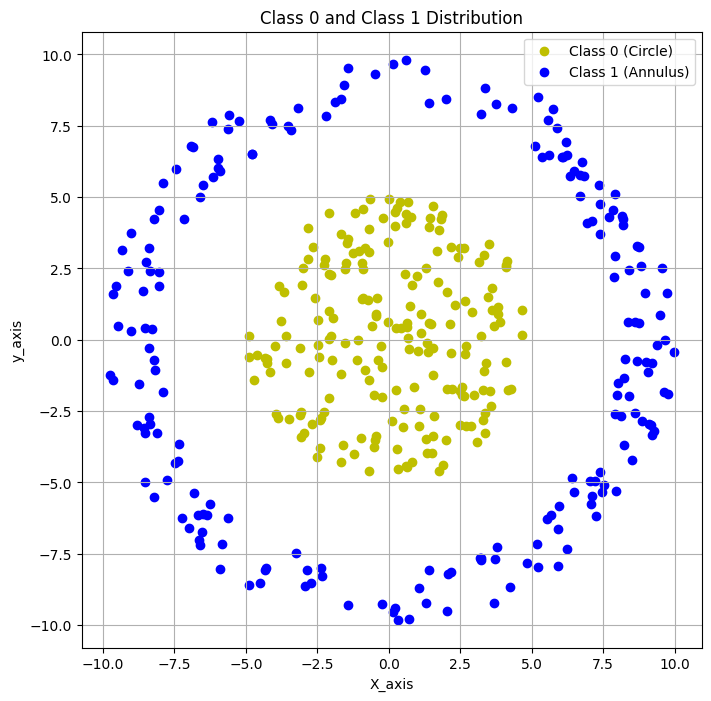

In [47]:
plt.figure(figsize=(8,8))
plt.scatter(class_0[:,0],class_0[:,1],color = "y", label = 'Class 0 (Circle)')
plt.scatter(class_1[:,0],class_1[:,1],color = "b",label = "Class 1 (Annulus)")
plt.xlabel("X_axis")
plt.ylabel("y_axis")
plt.title("Class 0 and Class 1 Distribution")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

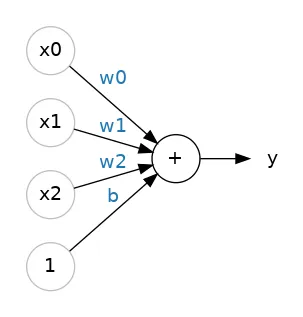

In [48]:
class Perceptron:
    def __init__(self, learning_rate = 0.01, n_epochs= 1000):
        self.learning_rate = learning_rate
        self.n_epoch = n_epochs
        self.weights = None
        self.bias = None
        self.errors_ = [] #storing the number of misclassifications in each epoch

    def fit(self, X, y):
        """
        Train the Perceptron model on the provided data.

        Parameters:
        X : array-like, shape = [n_samples, n_features]
            Training vectors.
        y : array-like, shape = [n_samples]
            Target values. Must be +1 or -1.
        """
        n_samples, n_featuers = X.shape
        #starting weights and bias equal zeros 
        self.weights = np.zeros(n_featuers)
        self.bias=0.0

        for epoch in range(self.n_epoch):
            errors = 0
            for idx in range(n_samples):
                linear_output = np.dot(X[idx],self.weights)+self.bias
                y_pred = self._unit_step(linear_output)
                if y[idx] != y_pred: #misclassfied
                    update = self.learning_rate * y[idx]
                    self.weights += update * X[idx]
                    self.bias += update
                    errors +=1 
            self.errors_.append(errors)
            # if no errors , convergence achieved
            if errors == 0:
                print(f"converged after {epoch+1} epochs")
                break
    def predict(self, X):
        """
        Predict class labels for samples in X.

        Parameters:
        X : array-like, shape = [n_samples, n_features]

        Returns:
        array, shape = [n_samples]
            Predicted class labels.
        """
        linear_output = np.dot(X, self.weights) + self.bias # W Γ * x + w º
        return self._unit_step(linear_output)
    def _unit_step(self, x):
        return np.where(x >= 0 ,1 , -1)



In [49]:
X_ab = np.vstack((class_A , class_B))
y_ab = np.hstack((np.ones(class_A.shape[0]),-np.ones(class_B.shape[0])))
shuffle_idx = np.random.permutation(len(X_ab))
X_ab, y_ab = X_ab [shuffle_idx],y_ab[shuffle_idx]

print("Combined Data Sample Point : \n ", X_ab[:5])
print("Combined Labels : \n", y_ab [:5])

Combined Data Sample Point : 
  [[0.43159912 8.91143114]
 [5.74473113 8.41828777]
 [9.38340457 1.81233066]
 [1.12038902 3.97855599]
 [5.20163501 8.521815  ]]
Combined Labels : 
 [ 1.  1. -1.  1.  1.]


In [50]:
perceptron = Perceptron(learning_rate=0.01, n_epochs = 1000)

perceptron.fit(X_ab, y_ab)

print(f"Final Weghits: {perceptron.weights}")
print(f"Final Bias {perceptron.bias}")

converged after 8 epochs
Final Weghits: [-0.43518699  0.43607194]
Final Bias -0.01


#### illustrate the decission boundary

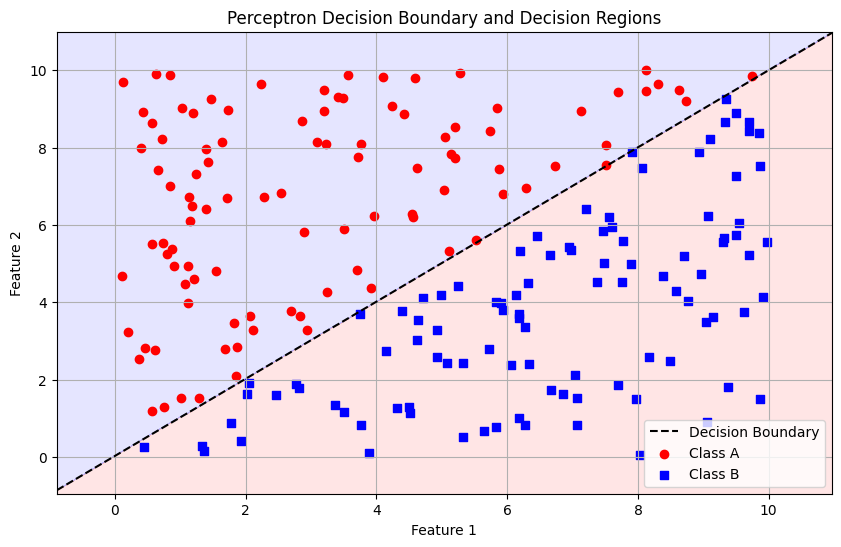

In [51]:
from matplotlib.colors import ListedColormap

x_min, x_max = X_ab[:,0].min() - 1, X_ab[:,0].max() + 1
y_min, y_max = X_ab[:,1].min() - 1, X_ab[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z= Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA','#AAAAFF'])
# cmap_bold = ListedColormap(['#FF0000','#0000FF'])
plt.figure(figsize= (10,6))

plt.contourf(xx,yy,Z,alpha=0.3, cmap=cmap_light)

if perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.weights[0] * x_vals + perceptron.bias) / perceptron.weights[1]
    plt.plot(x_vals, y_vals, 'k--', label = 'Decision Boundary')
else:
    x_val = -perceptron.bias / perceptron.weights[0]
    plt.axvline(x= x_val, color = 'k', linesyle = '--', label = 'Decision Boundary')


plt.scatter(class_A[:, 0], class_A[:, 1], color='red', marker='o', label='Class A')
plt.scatter(class_B[:, 0], class_B[:, 1], color='blue', marker='s', label='Class B')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary and Decision Regions')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X,columns=data.feature_names)
df['target'] = y

selected_features = ['mean radius', 'mean texture']
X_selected = df[selected_features].values
y_selected = y # 0 = malignant, 1 = benign

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected, test_size=0.2,
    random_state=42, stratify=y_selected
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}") 

Training samples: 455
Testing samples: 114


In [54]:
# convert labels: 0 -> -1, 1 -> 1
y_train_perceptron = np.where(y_train == 0, -1, 1)
y_test_perceptron = np.where(y_test == 0, -1, 1)


In [55]:
perceptron = Perceptron(learning_rate = 0.01, n_epochs = 1000)

perceptron.fit(X_train, y_train_perceptron)

print(f"Final Weight: {perceptron.weights}")
print(f"Final Bias: {perceptron.bias}")

Final Weight: [-1.63173 -0.3517 ]
Final Bias: 30.740000000002006


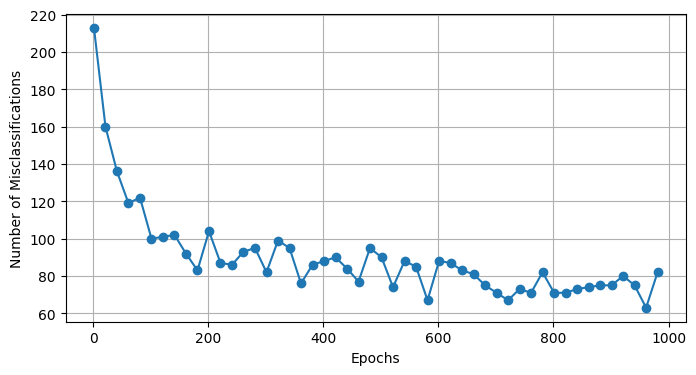

In [56]:
plt.figure(figsize=(8,4))
plt.plot(range(1, len(perceptron.errors_) + 1, 20),perceptron.errors_[::20],marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)
plt.show()

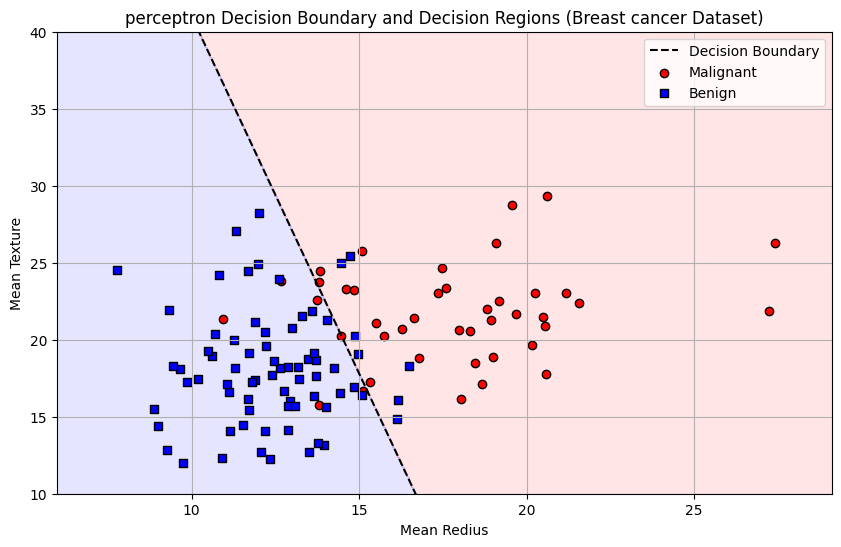

In [57]:
x_min, x_max = X_train[:,0].min() - 1 , X_train[:,0].max() + 1
y_min, y_max = X_train[:,1].min() - 1 , X_train[:,1].max() + 1 
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha = 0.3, cmap = cmap_light)

if perceptron.weights[1] != 0:
    x_vals = np.array([x_min, x_max])
    y_vals = -(perceptron.weights[0]*x_vals + perceptron.bias)/ perceptron.weights[1]
    plt.plot(x_vals, y_vals, "k--", label = "Decision Boundary" )
else:
    x_val = -perceptron.bias/perceptron.weights[0]
    plt.axvline(x=x_val, color = 'k', linestyle = '--', label = "Decision Boundary")

# Malignant: 0 (red), Benign: 1(blue)
plt.scatter(X_test[y_test == 0, 0 ], X_test[y_test == 0, 1],
            color = 'red', marker='o', edgecolors='k', label='Malignant')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1],
            color='b', marker='s', edgecolors='k',label='Benign')

plt.ylim(10,40)
plt.xlabel('Mean Redius')
plt.ylabel('Mean Texture')
plt.title("perceptron Decision Boundary and Decision Regions (Breast cancer Dataset)")
plt.legend()
plt.grid(True)
plt.show()